In [1]:
import os
import sys
import torch
import numpy as np
from scipy import stats
from tqdm import tqdm, tqdm_notebook
import matplotlib.pyplot as plt
import math
from torchvision import datasets 
import torchvision.transforms as transforms
import torchvision
# import dataset_input
import utilities
from tqdm import trange

from mnist_model import CNN




config = utilities.config_to_namedtuple(utilities.get_config('config_mnist.json'))

device = torch.device('cuda:0')

mnist_testset = datasets.MNIST(root='./data', train=False, download=False, transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.,), (1,))
]))

test_loader = torch.utils.data.DataLoader(mnist_testset,
    shuffle = False,
    batch_size = 10
)


filename = 'models/mnistmodel.pt'
model = CNN().to(device)
# optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
if os.path.isfile(filename):
    print("=> loading checkpoint '{}'".format(filename))
    checkpoint = torch.load(filename)
#     start_epoch = checkpoint['epoch']
    model.load_state_dict(checkpoint['state_dict'])
#     optimizer.load_state_dict(checkpoint['optimizer'])
    print("=> loaded checkpoint '{}' (epoch {})"
              .format(filename, checkpoint['epoch']))
else:
    print("=> no checkpoint found at '{}'".format(filename))
    
criterion = torch.nn.CrossEntropyLoss()




for i, (x_batch_eval, y_batch_eval) in enumerate(test_loader):
    if i == 0:
        x_batch = x_batch_eval
        y_batch = y_batch_eval

=> loading checkpoint 'models/mnistmodel.pt'
=> loaded checkpoint 'models/mnistmodel.pt' (epoch 55)


Correct label tensor(7)
Predicted label: tensor(7, device='cuda:0')
Confidence: tensor(16.7394, device='cuda:0')


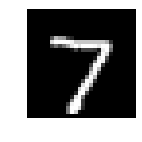

Correct label tensor(2)
Predicted label: tensor(2, device='cuda:0')
Confidence: tensor(28.8839, device='cuda:0')


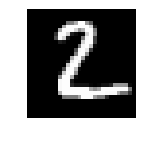

Correct label tensor(1)
Predicted label: tensor(1, device='cuda:0')
Confidence: tensor(12.9965, device='cuda:0')


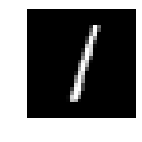

Correct label tensor(0)
Predicted label: tensor(0, device='cuda:0')
Confidence: tensor(15.9337, device='cuda:0')


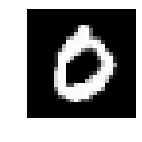

Correct label tensor(4)
Predicted label: tensor(4, device='cuda:0')
Confidence: tensor(17.4266, device='cuda:0')


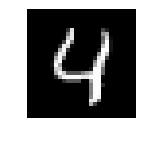

Correct label tensor(1)
Predicted label: tensor(1, device='cuda:0')
Confidence: tensor(16.6229, device='cuda:0')


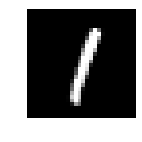

Correct label tensor(4)
Predicted label: tensor(4, device='cuda:0')
Confidence: tensor(15.7128, device='cuda:0')


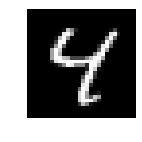

Correct label tensor(9)
Predicted label: tensor(9, device='cuda:0')
Confidence: tensor(12.3214, device='cuda:0')


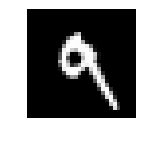

Correct label tensor(5)
Predicted label: tensor(5, device='cuda:0')
Confidence: tensor(15.4150, device='cuda:0')


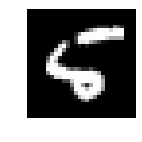

Correct label tensor(9)
Predicted label: tensor(9, device='cuda:0')
Confidence: tensor(21.1296, device='cuda:0')


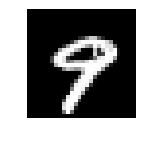

tensor(13.8837, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(10.2415, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(7.2054, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(4.9916, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(3.5060, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2.3056, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.5706, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.1317, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.7881, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.6814, device='cuda:0', grad_fn=<NllLossBackward>)
Correct label tensor(7)
Predicted label: tensor(1, device='cuda:0')
Confidence: tensor(4.5251, device='cuda:0')


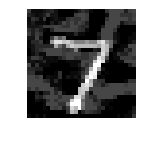

Correct label tensor(2)
Predicted label: tensor(1, device='cuda:0')
Confidence: tensor(11.2521, device='cuda:0')


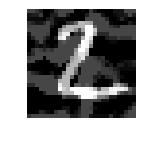

Correct label tensor(1)
Predicted label: tensor(1, device='cuda:0')
Confidence: tensor(16.1219, device='cuda:0')


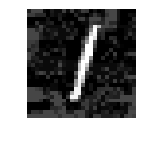

Correct label tensor(0)
Predicted label: tensor(7, device='cuda:0')
Confidence: tensor(2.7507, device='cuda:0')


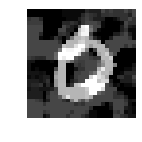

Correct label tensor(4)
Predicted label: tensor(1, device='cuda:0')
Confidence: tensor(3.7801, device='cuda:0')


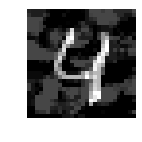

Correct label tensor(1)
Predicted label: tensor(1, device='cuda:0')
Confidence: tensor(17.7507, device='cuda:0')


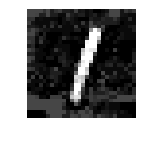

Correct label tensor(4)
Predicted label: tensor(1, device='cuda:0')
Confidence: tensor(6.7387, device='cuda:0')


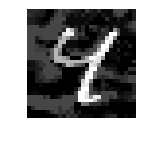

Correct label tensor(9)
Predicted label: tensor(1, device='cuda:0')
Confidence: tensor(6.4530, device='cuda:0')


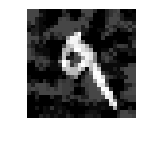

Correct label tensor(5)
Predicted label: tensor(5, device='cuda:0')
Confidence: tensor(2.5427, device='cuda:0')


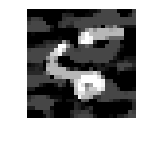

Correct label tensor(9)
Predicted label: tensor(1, device='cuda:0')
Confidence: tensor(5.4347, device='cuda:0')


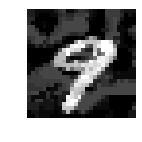

Show the difference


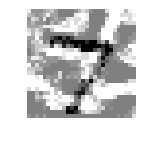

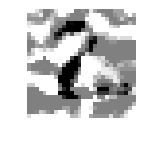

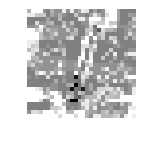

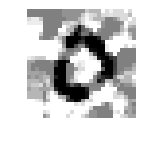

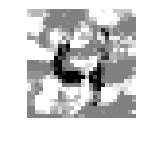

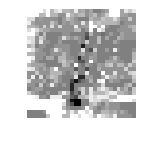

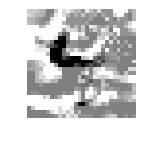

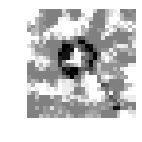

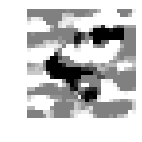

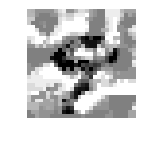

In [8]:
from attack import PGD

eps, step = (70.0,10)
sigmanew = 10.0
at = PGD(eps=eps / 255.0, sigma=sigmanew / 255.0, nb_iter=step)

model.eval()


pois_y_batch = y_batch
with torch.no_grad():
    inputs = x_batch.to(device)
    targets = y_batch.to(device)
    *_, outputs = model(inputs)
    loss = criterion(outputs, targets)
    _, predicted = outputs.max(1)
for i in range(0, 10):
    print('Correct label', y_batch[i])
    print('Predicted label:', predicted[i])
    print('Confidence:', torch.max(outputs[i]))
    plt.figure(figsize=(2, 2))
    plt.axis('off')
    plt.imshow(x_batch[i].reshape([28, 28]),cmap = "gray")
    plt.show()
target_number = 10
target_labels = np.zeros((1,target_number))
target_labels[0,:] = 1
target_labels = torch.from_numpy(target_labels.astype(np.int64)).to(device)

pois_x_batch = at.attack(model, inputs, targets, target_labels[0])
inputs = pois_x_batch.to(device)
targets = pois_y_batch.to(device)
with torch.no_grad():
    *_, outputs = model(inputs)
    _, predicted = outputs.max(1)



for i in range(0, 10):
    print('Correct label', y_batch[i])
    print('Predicted label:', predicted[i])
    print('Confidence:', torch.max(outputs[i]))
    plt.figure(figsize=(2, 2))
    plt.axis('off')
    plt.imshow(pois_x_batch[i].reshape([28, 28]).detach().cpu().numpy(),cmap = "gray")
    plt.show()
    
    
print('Show the difference')    
for i in range(0, 10):
    plt.figure(figsize=(2, 2))
    plt.axis('off')
    plt.imshow(pois_x_batch[i].reshape([28, 28]).detach().cpu().numpy()-x_batch[i].reshape([28, 28]).detach().cpu().numpy(),cmap = "gray")
    plt.show()

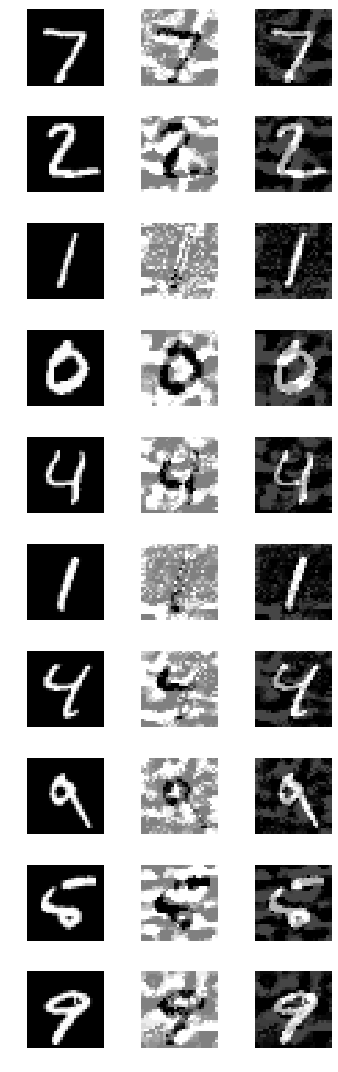

In [9]:
f, axarr = plt.subplots(10, 3, figsize=(5,15))
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 250
for i in range(10):
    axarr[i,0].set_axis_off()
    axarr[i,1].set_axis_off()
    axarr[i,2].set_axis_off()
    axarr[i,0].imshow(x_batch[i].reshape([28, 28]), cmap = "gray")
    axarr[i,1].imshow(pois_x_batch[i].reshape([28, 28]).detach().cpu().numpy()-x_batch[i].reshape([28, 28]).detach().cpu().numpy(), cmap = "gray")
    axarr[i,2].imshow((pois_x_batch[i]).reshape([28, 28]).detach().cpu().numpy(), cmap="gray")
    
plt.tight_layout()
plt.show()